In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
wine = load_wine(as_frame=True)

In [3]:
X = wine.data
y = wine.target
columns = wine.frame.columns.to_list()

In [4]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 15
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
X_knn = knn_model.fit(X, y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=111222, stratify=y)
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [41 50 33]
Количество строк в y_test по классам: [18 21 15]


In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
predictions = X_knn.predict(X) #Определим метки классов для тестовых данных
accuracy_score(y, predictions) #Оценим точность определения меток

0.7191011235955056

In [8]:
confusion_matrix(y, predictions)

array([[54,  0,  5],
       [ 4, 44, 23],
       [ 5, 13, 30]])

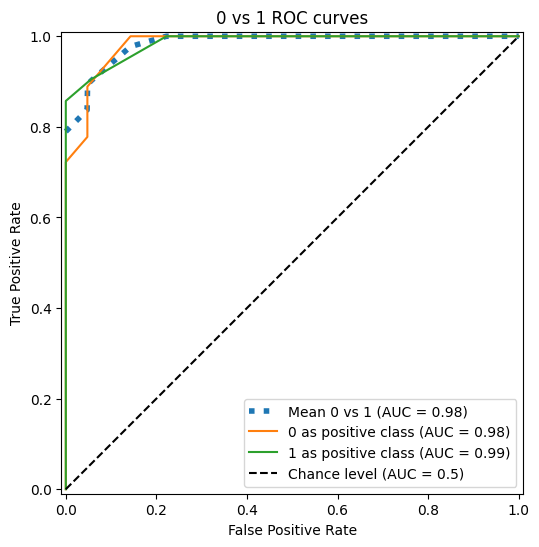

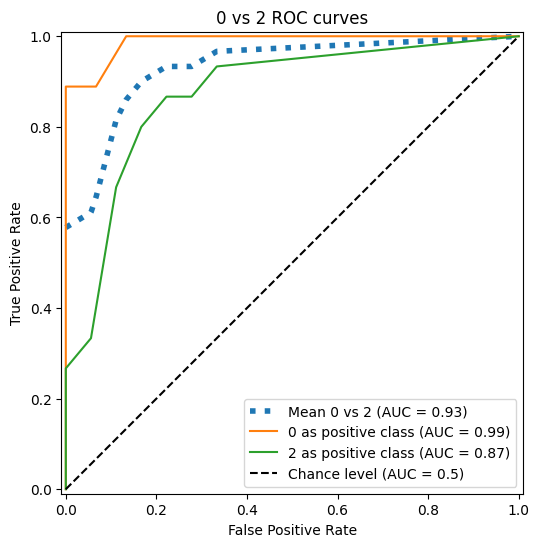

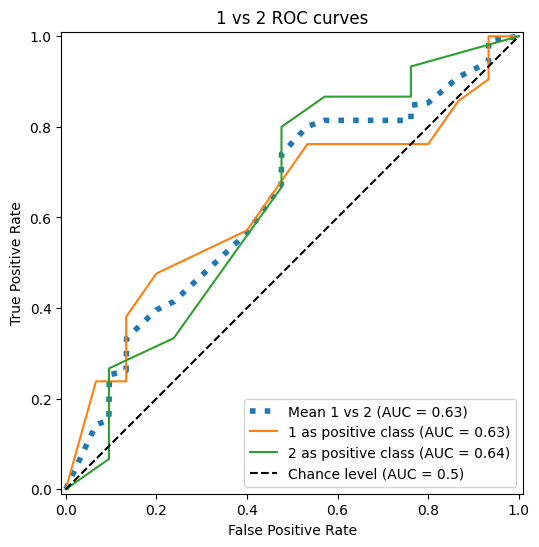

In [9]:
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import RocCurveDisplay 
from itertools import combinations
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_score = knn_model.fit(X_train, y_train).predict_proba(X_test)

pair_list = list(combinations(np.unique(y), 2))
pair_scores = []
fpr_grid = np.linspace(0.0, 1.0, 1000)
mean_tpr = dict()

for ix, (label_a, label_b) in enumerate(pair_list):
    a_mask = y_test == label_a
    b_mask = y_test == label_b
    ab_mask = np.logical_or(a_mask, b_mask)

    a_true = a_mask[ab_mask]
    b_true = b_mask[ab_mask]

    idx_a = np.flatnonzero(label_binarizer.classes_ == label_a)[0]
    idx_b = np.flatnonzero(label_binarizer.classes_ == label_b)[0]

    fpr_a, tpr_a, _ = roc_curve(a_true, y_score[ab_mask, idx_a])
    fpr_b, tpr_b, _ = roc_curve(b_true, y_score[ab_mask, idx_b])

    mean_tpr[ix] = np.zeros_like(fpr_grid)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_a, tpr_a)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_b, tpr_b)
    mean_tpr[ix] /= 2
    mean_score = auc(fpr_grid, mean_tpr[ix])
    pair_scores.append(mean_score)

    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {label_a} vs {label_b} (AUC = {mean_score :.2f})",
        linestyle=":",
        linewidth=4,
    )
    RocCurveDisplay.from_predictions(
        a_true,
        y_score[ab_mask, idx_a],
        ax=ax,
        name=f"{label_a} as positive class",
    )
    RocCurveDisplay.from_predictions(
        b_true,
        y_score[ab_mask, idx_b],
        ax=ax,
        name=f"{label_b} as positive class",
        plot_chance_level=True,
    )
    ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"{idx_a} vs {label_b} ROC curves",
    )

In [10]:
import holoviews as hv
from holoviews import dim, opts, Cycle
import hvplot.pandas  # noqa
import hvplot.dask  # noqa
hv.extension('bokeh')

ImportError: Could not patch plotting API onto dask. Dask could not be imported.

In [ ]:
hv.help(hv.Bars)

In [ ]:
hv.extension('plotly')
neighbors = np.arange(2, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X, y)
      
# Generate plot

hv.Bars((neighbors, train_accuracy), label = 'Точность классификации').opts(ylim=(0.5,1), width =600, height =400)


In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(2, 25))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()

In [ ]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False, verbose=3)
# fitting the model for grid search
# cv:int, cross-validation generator or an iterable, default=None
# Determines the cross-validation splitting strategy. 
# integer, to specify the number of folds 
grid_search=grid.fit(X,y)

In [ ]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy is : {:.2f}%".format(accuracy) )

In [ ]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
errors = [(i, means[i], stds[i] ) for i in range(len(params))]
bars = [params[i]['n_neighbors'] for i in range(len(params))]
hv.Bars(means,hv.Dimension('n_neighbors'),'Score').opts ( ylim=(0.5,1), width =600, height =300) * hv.ErrorBars(errors).opts(color = 'black')

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(X)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
X.describe()

In [ ]:
n_neighbors = 7
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
X_knn = knn_model.fit(X, y)
predictions = X_knn.predict(X) #Определим метки классов для тестовых данных
print(accuracy_score(y, predictions)) #Оценим точность определения меток
print(confusion_matrix(y, predictions))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=111222, stratify=y)
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

In [ ]:
n_neighbors = 7
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
X_knn = knn_model.fit(X_train, y_train)
predictions = X_knn.predict(X_test) #Определим метки классов для тестовых данных
print(accuracy_score(y_test, predictions)) #Оценим точность определения меток
print(confusion_matrix(y_test, predictions))

In [ ]:
import holoviews as hv
from holoviews import dim, opts
hv.extension('plotly')

In [ ]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import panel as pn
import hvplot.pandas

hv.extension('plotly')

feature1 = pn.widgets.Select(name='Признак1', options=columns[0:13],value= columns[0], width = 250)
feature2 = pn.widgets.Select(name='Признак2', options=columns[0:13],value= columns[1], width = 250)
feature3 = pn.widgets.Select(name='Признак3', options=columns[0:13],value= columns[2], width = 250)

cmap_light = ListedColormap([ 'blue',  'red', 'orange' ])
cmap_bold = ListedColormap(['darkblue', 'darkred', 'darkorange'])

res_X_train=X_train.copy()
res_X_train['Target']=y_train.copy()

res_X_test=X_test.copy()
res_X_test ['Target']=y_test.copy()
res_X_test['Predicted']= X_knn.predict(X_test)
res_X_pred=res_X_test[res_X_test['Target']!=res_X_test['Predicted']].copy()

def get_plot(feature1, feature2, feature3):

    plot1= hv.Scatter3D(data=res_X_train, kdims=[feature1,feature2, feature3]).opts(
        cmap=cmap_light, color='Target', marker='circle',
        size=5, alpha=0.25,  height=600, width=600)
    
    plot2= hv.Scatter3D(data=res_X_test, kdims=[feature1,feature2, feature3]).opts(
        cmap=cmap_bold, color='Target', marker='circle',
        size=5, alpha=0.75,  height=600, width=600)
    
    
    plot3= hv.Scatter3D(data=res_X_pred, kdims=[feature1,feature2, feature3]).opts(
        cmap=cmap_bold, color='Predicted', marker='cross',
        size=9, alpha=1, height=600, width=600, title ='Error values')
    plot=(plot1*plot2*plot3).opts( title ='Результаты классификации' )

    return(plot)

pn.Row(
       
    pn.pane.HoloViews(
        pn.bind(get_plot, feature1, feature2, feature3)
    ).servable(),
    pn.WidgetBox(
        pn.Column(
            "Выбор признаков",
            feature1,
            feature2,
            feature3,
            height = 400,
            ).servable(target='sidebar')
    ),
)


In [ ]:
import bokeh.io
bokeh.io.output_notebook()